In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("N-L.csv").iloc[:,:]
#print(df)
df.index = df.iloc[:,0]
df = df.iloc[:,1:]

In [21]:
df

,N,N.1,N.2,N.3,N.4,N.5,N.6,N.7,N.8,N.9,...,T.258,T.259,T.260,T.261,T.262,T.263,T.264,T.265,T.266,T.267
ID_REF,,,,,,,,,,,,,,,,,,,,,
100121619_TGI_at,0.194782,0.277651,0.181603,0.255974,0.379691,0.329180,0.100339,0.126527,0.196321,0.287757,...,0.266785,0.275601,0.075564,0.215808,0.116228,0.268196,0.180623,0.182192,0.145581,0.214394
100121620_TGI_at,2.986998,1.950148,2.767151,1.734856,0.516721,0.489887,2.263027,2.059777,5.212530,1.558463,...,0.548224,0.585656,4.729860,0.931806,1.971228,0.914422,0.840366,1.241014,1.001693,0.313106
100121621_TGI_at,14.945500,15.884860,15.098440,14.833470,11.277620,13.522700,15.326030,15.404580,11.055910,14.905020,...,3.332501,9.248215,2.532351,15.874360,4.017270,8.639039,7.382693,11.558040,2.692842,4.515063
100121622_TGI_at,0.010736,0.010238,0.010447,0.009079,0.013351,0.011007,0.009778,0.010722,0.009688,0.010053,...,0.012028,0.017966,0.014724,0.014535,0.009972,0.015895,0.008491,0.020521,0.008350,0.011917
100121623_TGI_at,0.968368,0.856167,1.271524,0.896868,0.854832,1.575656,1.252704,1.476249,1.677907,1.082058,...,7.979432,1.112512,1.532220,0.651489,1.516363,0.992698,1.297633,1.293203,0.617395,0.779912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100163198_TGI_at,0.045995,0.039721,0.033763,0.028393,0.035181,0.039297,0.041861,0.028147,0.028478,0.029863,...,0.027035,0.038857,0.034641,0.033056,0.035580,0.027679,0.034507,0.025867,0.025620,0.031032
100163199_TGI_at,0.122195,0.140062,0.085449,0.100783,0.429549,0.261679,0.073566,0.156666,0.067847,0.118234,...,0.311631,0.197527,0.131346,0.187137,0.567188,0.075236,0.485438,0.177131,0.133217,0.126240
100163200_TGI_at,0.660449,0.634174,0.476336,0.766654,0.696202,0.999387,0.347655,0.681286,0.358512,0.225215,...,0.965120,1.815123,0.410969,0.661243,0.329580,1.186685,0.067569,0.429374,0.547224,0.617470


In [22]:
prefixes = set([col.split('.')[0] for col in df.columns[1:]])
num_groups = len(prefixes)

In [23]:
num_groups

2

In [24]:
prefixes

{'N', 'T'}

In [25]:
df.rename(columns={col: col.split('.')[0] for col in df.columns}, inplace=True)


In [26]:
data1 = df.dropna()
print(data1.shape)
shuffled_df = data1.sample(frac=1, axis=1)
#print (shuffled_df)
pv = shuffled_df.transpose()
                
        
feature_mean = np.mean(pv,axis=0)
feature_std = np.std(pv,axis=0)
print ()
sample_normalization=(pv- feature_mean)/(feature_std)#-feature_min)

sample_normalization = sample_normalization.transpose()

(37582, 511)



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
df_transposed = sample_normalization.T [:]
print (df_transposed)
X = df_transposed 
y = df_transposed.index
print (y)
disease_to_label = {disease: label for label, disease in enumerate(y.unique())}
y = y.map(disease_to_label)
print(disease_to_label)
print (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



ID_REF  100121619_TGI_at  100121620_TGI_at  100121621_TGI_at  \
N               0.683401         -0.210436          0.865590   
N               1.678336         -0.362080          0.461470   
T              -0.480131         -0.670888          0.312175   
T              -0.260805         -0.217649          0.049419   
N              -0.263335          0.209185          0.997796   
..                   ...               ...               ...   
N               0.824792         -1.249371          0.720201   
N               4.119227         -1.158560          1.314783   
N               1.443898         -0.753046          0.021971   
T               0.747398         -1.038939         -2.061274   
N               1.725969         -1.323683         -0.899530   

ID_REF  100121622_TGI_at  100121623_TGI_at  100121624_TGI_at  \
N               0.070255         -0.593770         -0.671578   
N              -0.099842         -0.319390         -0.659605   
T              -0.067683          0.101

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
import numpy as np

def compute_markov_coefficients(data, labels, gamma):
    
    n_samples, n_features = data.shape  
    classes = np.unique(labels)
    g = len(classes)
    class_indices = [np.where(labels == c)[0] for c in classes]
    markov_coefficients = np.zeros(n_features)

    for j in range(n_features):
        within_class_sum = 0
        for i in range(g):
            class_data = data[class_indices[i]][:, j]
            ni = len(class_data)
            within_class_sum += np.sum(np.outer(class_data, class_data)) / ni
            
        within_class_sum /= n_samples  
        total_sum = np.sum(np.square(data[:, j]))
        markov_coefficients[j] = within_class_sum - (gamma / n_samples) * total_sum + (gamma - 1) / (n_samples ** 2) * np.sum(np.outer(data[:, j], data[:, j]))

    return markov_coefficients

def fisher_markov_selector(data, labels, gamma, beta,top_n):
    
    n_samples, n_features = data.shape
    markov_coefficients = compute_markov_coefficients(data, labels, gamma)
    op_features_indices = np.argsort(markov_coefficients)[-top_n:] 
    print (op_features_indices)
    return op_features_indices



In [14]:
X_train1 = np.array(X_train)
X_test1 = np.array(X_test)

In [17]:
selected_features = fisher_markov_selector(np.array(X), y, gamma=-0.5, beta=1.35,top_n=5)


[11933 14150 11767  8098 27598]


In [16]:
X_train_selected = X_train1[:, selected_features]
X_test_selected = X_test1[:, selected_features]

In [17]:
import torch
import torch.nn.functional as F


y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
print (y_test)

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.])


In [21]:
import torch
import torch.nn.functional as F


X_train_selected = torch.tensor(np.array(X_train_selected), dtype=torch.float32)
X_test_selected = torch.tensor(np.array(X_test_selected), dtype=torch.float32)
print (X_test_selected.shape)

torch.Size([103, 5])


In [23]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np



In [51]:
model = KAN(width=[5,10,1], grid=25, k=1)

def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=20,lamb=0.01, lamb_entropy=1., metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

train loss: 4.25e-02 | test loss: 1.27e-01 | reg: 7.53e+00 : 100%|██| 20/20 [00:25<00:00,  1.27s/it]


(1.0, 0.9902912378311157)

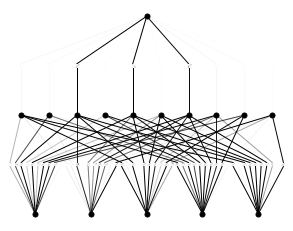

In [54]:
model.plot(beta=100)

In [56]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
formula

fixing (0,0,0) with sin, r2=0.6827627487700276
fixing (0,0,1) with sin, r2=0.946897018359
fixing (0,0,2) with sin, r2=0.9945871608269665
fixing (0,0,3) with sin, r2=0.9249328095293204
fixing (0,0,4) with x^2, r2=0.9959051169481468
fixing (0,0,5) with sin, r2=0.5324053797298175
fixing (0,0,6) with sin, r2=0.9965307293871841
fixing (0,0,7) with sin, r2=0.9814878093687914
fixing (0,0,8) with sin, r2=0.9879327335548503
fixing (0,0,9) with sin, r2=0.5417606513386827
fixing (0,1,0) with tan, r2=0.5788979270225917
fixing (0,1,1) with tanh, r2=0.4422437711276025
fixing (0,1,2) with tanh, r2=0.8528648039668971
fixing (0,1,3) with tanh, r2=0.3562340529984663
fixing (0,1,4) with tanh, r2=0.9085865815487391
fixing (0,1,5) with tan, r2=0.26814114169016195
fixing (0,1,6) with tanh, r2=0.9700884205134173
fixing (0,1,7) with sin, r2=0.3507730354090984
fixing (0,1,8) with tan, r2=0.34708298711334556
fixing (0,1,9) with sin, r2=0.9948939145680551
fixing (0,2,0) with sqrt, r2=0.9958917793683201
fixing (0

-1.21*sin(0.46*sin(0.48*x_1 - 4.15) + 0.19*sin(0.75*x_3 + 2.17) + 0.77*sin(0.48*x_4 + 2.04) - 0.7*sin(0.4*x_5 - 7.38) - 0.03*tanh(10.0*x_2 - 10.0) - 6.91) - 3.0*tan(0.03*(0.5*x_1 + 1)**2 - 0.12*sin(0.33*x_3 + 8.34) - 0.15*sin(0.53*x_4 + 8.38) + 0.01*tanh(8.6*x_2 - 10.0) + 0.1*tanh(0.61*x_5 - 1.06) - 6.89) - 2.07